In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

Using lemonade.csv dataset and focusing on continuous variables:

Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [3]:
df = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')

In [4]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,365.0,61.224658,18.085892,15.1,49.70,61.10,71.70,212.0
Rainfall,365.0,0.825973,0.273890,0.4,0.65,0.74,0.91,2.5
Flyers,365.0,40.104110,13.786445,-38.0,31.00,39.00,49.00,80.0
Price,365.0,0.500000,0.000000,0.5,0.50,0.50,0.50,0.5
Sales,365.0,27.865753,30.948132,7.0,20.00,25.00,30.00,534.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [8]:
# change the date to a datetime object and reset it as the index:
df.Date = pd.to_datetime(df.Date)

In [9]:
df = df.set_index('Date')

In [10]:
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10
2017-01-02,Monday,28.9,1.33,15,0.5,13
2017-01-03,Tuesday,34.5,1.33,27,0.5,15
2017-01-04,Wednesday,44.1,1.05,28,0.5,17
2017-01-05,Thursday,42.4,1.00,33,0.5,18


In [11]:
# create a month column:
df['Month'] = df.index.month_name()

In [12]:
df.head(3)

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-01-02,Monday,28.9,1.33,15,0.5,13,January
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January


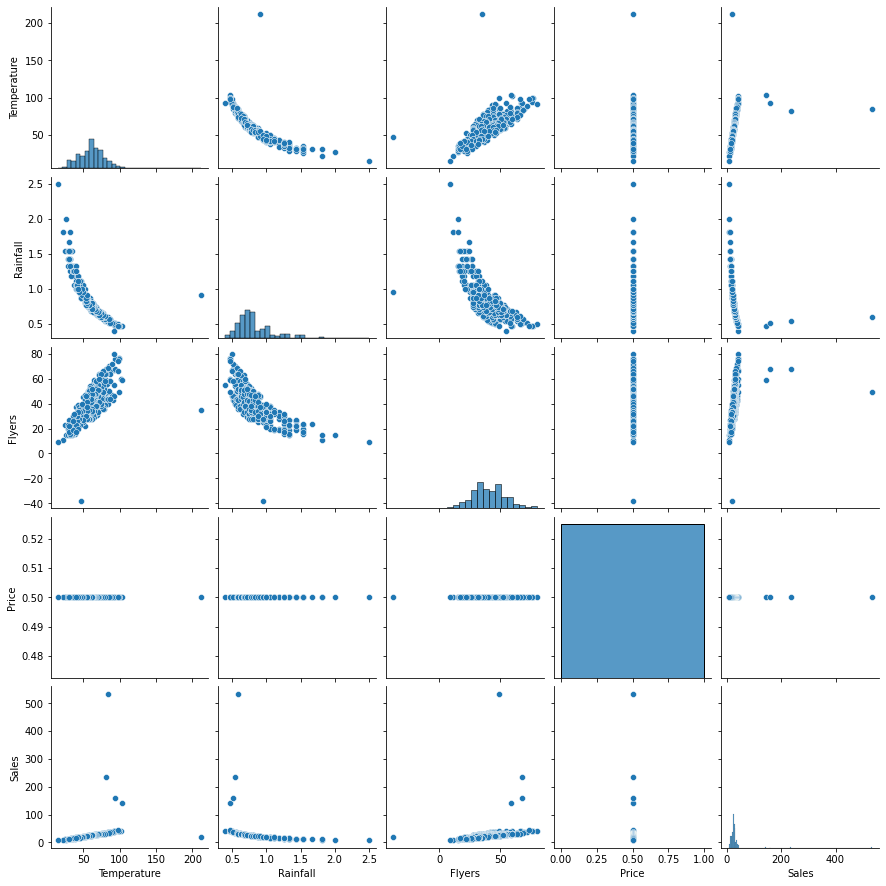

In [13]:
sns.pairplot(df)

Day


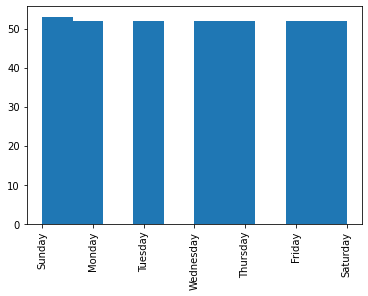

Temperature


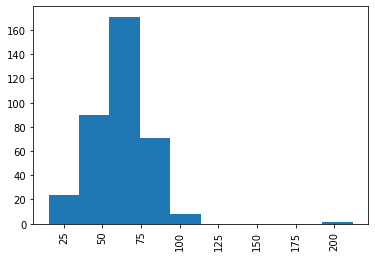

Rainfall


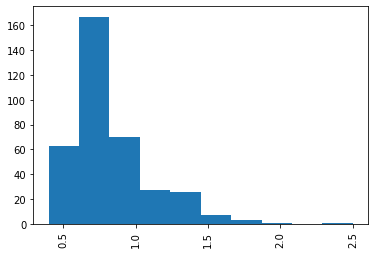

Flyers


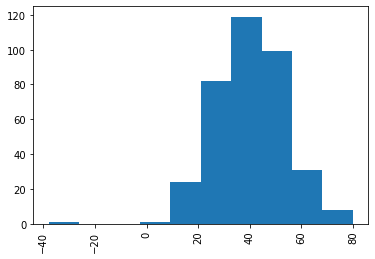

Price


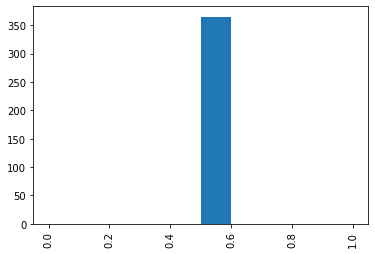

Sales


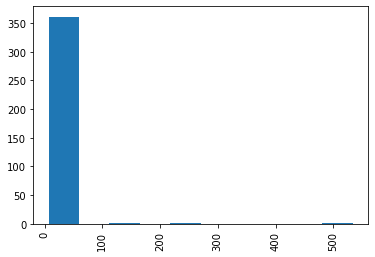

Month


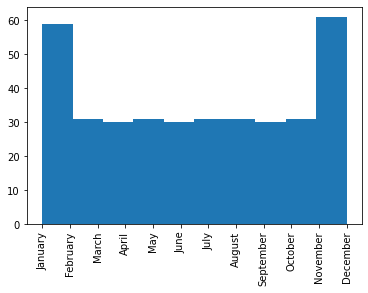

In [14]:
for col in df.columns:
    print(col)
    plt.hist(df[col])
    plt.xticks(rotation = 90)
    plt.show()

In [15]:
def get_low_and_up_bounds_df(df, k=1.5):
    '''
    This function takes in a pandas dataframe, list of columns, and k value, and will print out upper and lower bounds for each column.
    It takes in a default argument of the col_list being all numeric columns, and the k value=1.5
    '''
    from IPython.display import display, display_html
    col_list=list(df.select_dtypes(include=['int', 'float'], exclude='O'))
    for col in col_list:
        # Find the lower and upper quartiles
        q_25, q_75 = df[col].quantile([0.25, 0.75])
        # Find the Inner Quartile Range
        q_iqr = q_75 - q_25
        # Find the Upper Bound
        q_upper = q_75 + (k * q_iqr)
        # Find the Lower Bound
        q_lower = q_25 - (k * q_iqr)
        # Identify outliers
        outliers_lower = df[df[col] < q_lower]
        outliers_upper = df[df[col] > q_upper]
        # outliers_all = pd.concat([outliers_lower, outliers_upper], axis=0)
        print('')
        print(col)
        print(f'K: {k}')
        print(f'Lower Fence: {q_lower}')
        print(f'Upper Fence: {q_upper}')
        print('')
        print(f'Lower Outliers in {col}')
        print('')
        display(outliers_lower)
        print('')
        print(f'Upper Outliers in {col}')
        print('')
        display (outliers_upper)
        print('')
        plt.figure(figsize=(16,4))
        plt.subplot(1, 2, 1)
        sns.histplot(data = df, x = col, kde=True)
        plt.axvline(x = q_lower, color = 'orange')
        plt.axvline(x = q_upper, color= 'orange')
        plt.title(col)
        plt.subplot(1, 2, 2)
        sns.boxplot(x=col, data=df, whis = k)
        plt.title(col)
        plt.show()
        print('-------------------------------------------------------------------')


Temperature
K: 1.5
Lower Fence: 16.700000000000003
Upper Fence: 104.7

Lower Outliers in Temperature



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-12-31,Sunday,15.1,2.5,9,0.5,7,December



Upper Outliers in Temperature



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February


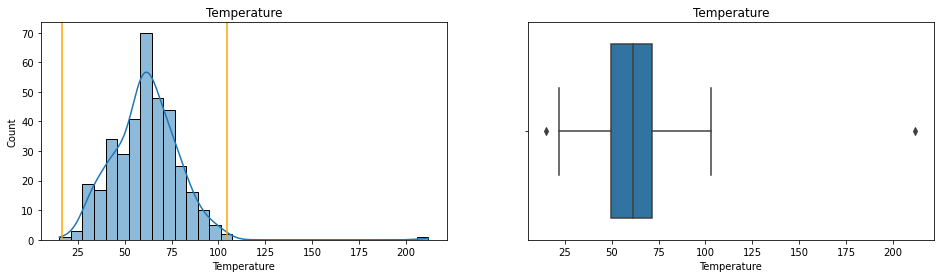

-------------------------------------------------------------------

Rainfall
K: 1.5
Lower Fence: 0.26
Upper Fence: 1.3

Lower Outliers in Rainfall



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,



Upper Outliers in Rainfall



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-01-02,Monday,28.9,1.33,15,0.5,13,January
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January
2017-01-06,Friday,25.3,1.54,23,0.5,11,January
2017-01-07,Saturday,32.9,1.54,19,0.5,13,January
2017-01-11,Wednesday,32.6,1.54,23,0.5,12,January
2017-01-12,Thursday,38.2,1.33,16,0.5,14,January
2017-01-13,Friday,37.5,1.33,19,0.5,15,January
2017-01-16,Monday,30.6,1.67,24,0.5,12,January


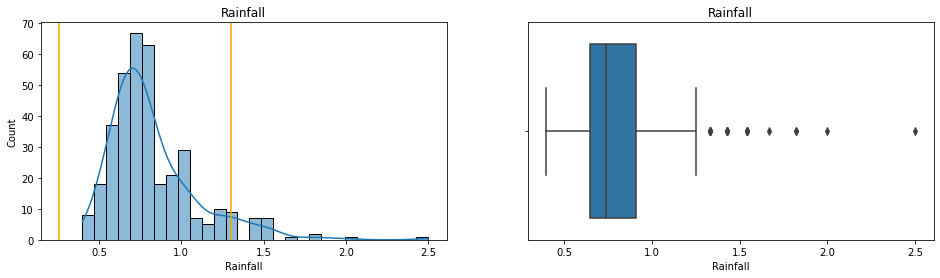

-------------------------------------------------------------------

Flyers
K: 1.5
Lower Fence: 4.0
Upper Fence: 76.0

Lower Outliers in Flyers



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20,November



Upper Outliers in Flyers



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-06-16,Friday,99.3,0.47,77,0.5,41,June
2017-07-14,Friday,92.0,0.50,80,0.5,40,July


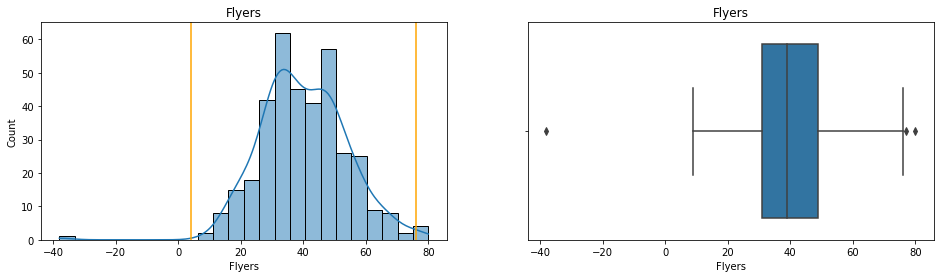

-------------------------------------------------------------------

Price
K: 1.5
Lower Fence: 0.5
Upper Fence: 0.5

Lower Outliers in Price



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,



Upper Outliers in Price



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,


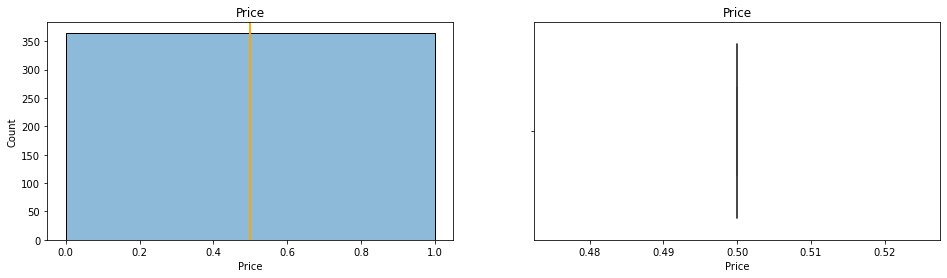

-------------------------------------------------------------------

Sales
K: 1.5
Lower Fence: 5.0
Upper Fence: 45.0

Lower Outliers in Sales



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,



Upper Outliers in Sales



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-07-01,Saturday,102.9,0.47,59,0.5,143,July
2017-07-02,Sunday,93.4,0.51,68,0.5,158,July
2017-07-03,Monday,81.5,0.54,68,0.5,235,July
2017-07-04,Tuesday,84.2,0.59,49,0.5,534,July


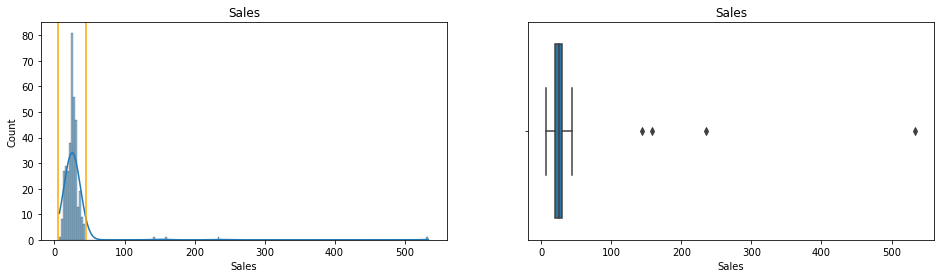

-------------------------------------------------------------------


In [16]:
get_low_and_up_bounds_df(df)

Rainfall

ther is not lower outliers
there is a value about 2.5


Flyers
K: 1.5
Lower Fence: 4.0
Upper Fence: 76.0

Lower Outliers in Flyers



,Flyers
Date,
2017-11-21,-38



Upper Outliers in Flyers



,Flyers
Date,
2017-06-16,77
2017-07-14,80


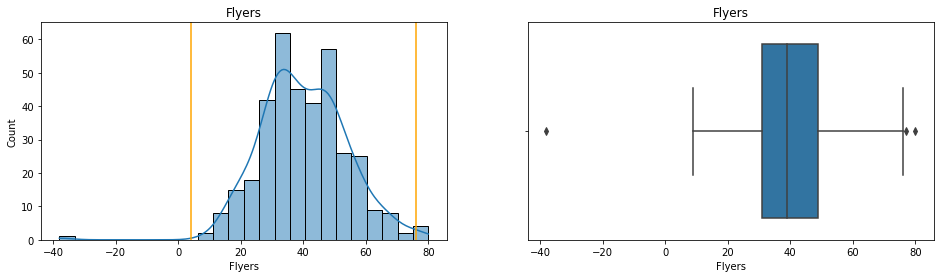

-------------------------------------------------------------------


In [17]:
get_low_and_up_bounds_df(df[['Flyers']])

Flyers: -38 value it does not make sense


Price
K: 1.5
Lower Fence: 0.5
Upper Fence: 0.5

Lower Outliers in Price



,Price
Date,



Upper Outliers in Price



,Price
Date,


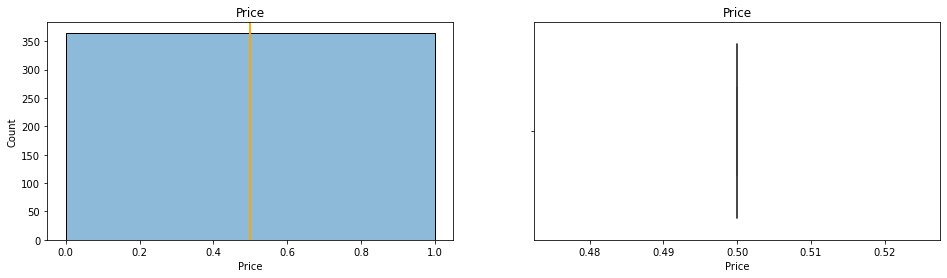

-------------------------------------------------------------------


In [18]:
get_low_and_up_bounds_df(df[['Price']])

Note: no outliers in Price